In [58]:
# 데이터를 분석하는데 필요한 패키지 로드하기 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'}) 

# 데이터 불러오기
raw_df1 = pd.read_csv('Data1.csv', encoding='UTF-8') ## 인코딩 설정하지 않으면 에러 발생

# 복사본 만들기 
df = raw_df1.copy()



<h3>1. 결제취소건수 별 시군명 군집화</h3>

In [59]:
print(min(df['결제취소건수']))
print(max(df['결제취소건수']))

0.0
128058.0


시군 별로 결제취소건수 평균을 내어 군집화하기 전 각 시군별로 나와있는 결제건수들의 군집화 위치를 산포도로 확인

      기준연도  시군명 연령대 성별     결제건수          결제금액   결제취소건수       결제취소금액  1회평균결제금액  \
0     2023  가평군  10  남     8409  1.888451e+08     46.0    4871840.0   22457.0   
1     2023  가평군  10  여     6584  1.766054e+08     68.0    1841390.0   26823.0   
2     2023  가평군  20  남    70363  1.545018e+09    728.0   37559999.0   21958.0   
3     2023  가평군  20  여    55118  1.332507e+09    681.0   27996349.0   24176.0   
4     2023  가평군  30  남   110968  2.682235e+09   1382.0   84476317.0   24171.0   
...    ...  ...  .. ..      ...           ...      ...          ...       ...   
1532  2021  화성시  70  남    93924  2.016729e+09    878.0   36744696.0   21472.0   
1533  2021  화성시  70  여    94936  2.113137e+09    948.0   31082093.0   22259.0   
1534  2021  화성시  80  남    14820  2.960631e+08    128.0    3424209.0   19977.0   
1535  2021  화성시  80  여    19625  4.419913e+08    191.0    6208072.0   22522.0   
1536  2021  화성시  기타  -  1245634  2.980095e+10  11553.0  415381458.0   23924.0   

            총인구     총인구_남  

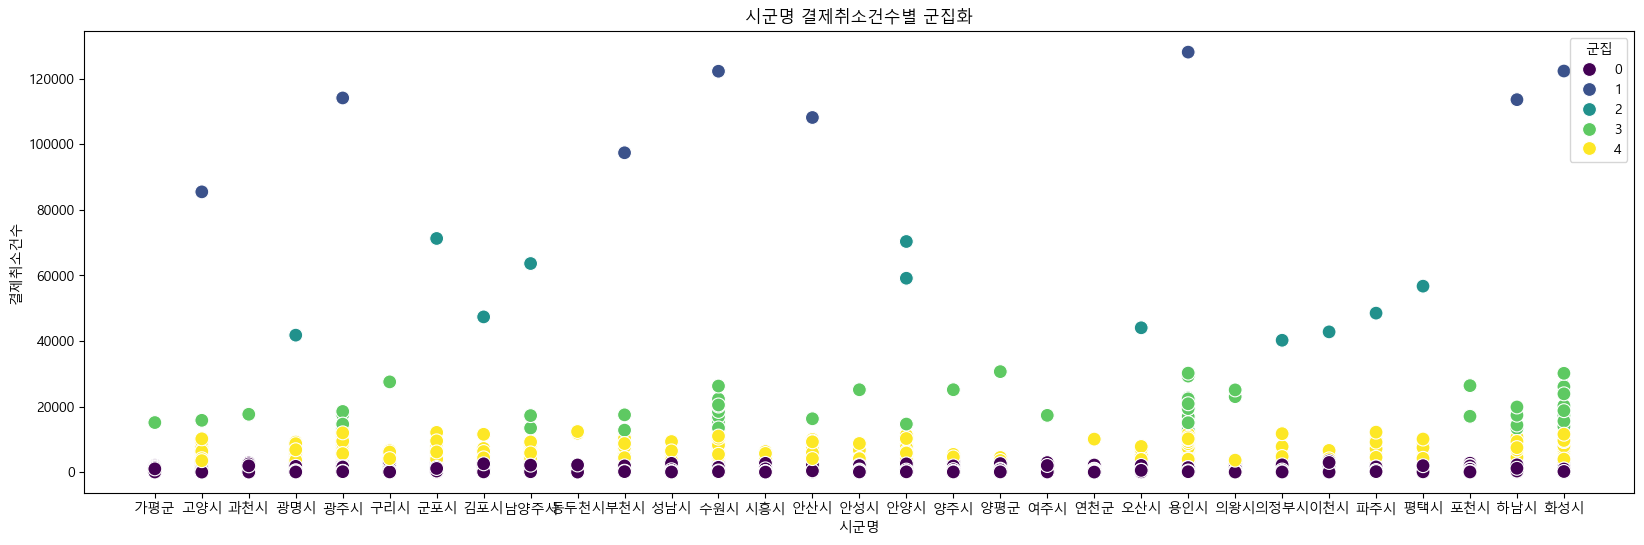

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


# 결제취소건수를 군집화하기 위해 필요한 데이터만 추출
X = df[['결제취소건수']]

# 결측값을 평균값으로 대체
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 결제취소건수 정규화 (0과 1 사이의 값으로 변환)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_imputed)

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['군집'] = kmeans.fit_predict(X_scaled)

# 결과 출력
print(df)

# 시각화
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='시군명', y='결제취소건수', hue='군집', palette='viridis', s=100)
plt.title('시군명 결제취소건수별 군집화')
plt.xlabel('시군명')
plt.ylabel('결제취소건수')
plt.legend(title='군집')
plt.show()

시군별로 결제취소건수 평균하여 하나의 값으로 반환

In [61]:
# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# 결과 출력
print(avg_cancel_count)

     시군명        결제취소건수
0    가평군   1321.228571
1    고양시   5926.861111
2    과천시   1261.226415
3    광명시   3311.037736
4    광주시   7809.509434
5    구리시   2066.115385
6    군포시   5359.314286
7    김포시   3387.142857
8   남양주시   5365.147059
9   동두천시   1079.444444
10   부천시   7773.142857
11   성남시   1676.000000
12   수원시   9458.471698
13   시흥시   1414.407407
14   안산시   7976.457143
15   안성시   2358.019231
16   안양시   6020.870370
17   양주시   1906.627451
18   양평군   2323.098039
19   여주시   1425.588235
20   연천군    727.137255
21   오산시   3000.514286
22   용인시   9845.471698
23   의왕시   1996.648148
24  의정부시   3035.037736
25   이천시   3472.114286
26   파주시   4245.764706
27   평택시   4902.914286
28   포천시   1805.173077
29   하남시   8292.114286
30   화성시  10002.519231


시군별 군집화 실행

   군집                                                시군명
0   0  [가평군, 과천시, 구리시, 동두천시, 성남시, 시흥시, 안성시, 양주시, 양평군,...
1   1                                    [수원시, 용인시, 화성시]
2   2                         [고양시, 군포시, 남양주시, 안양시, 평택시]
3   3                    [광명시, 김포시, 오산시, 의정부시, 이천시, 파주시]
4   4                               [광주시, 부천시, 안산시, 하남시]


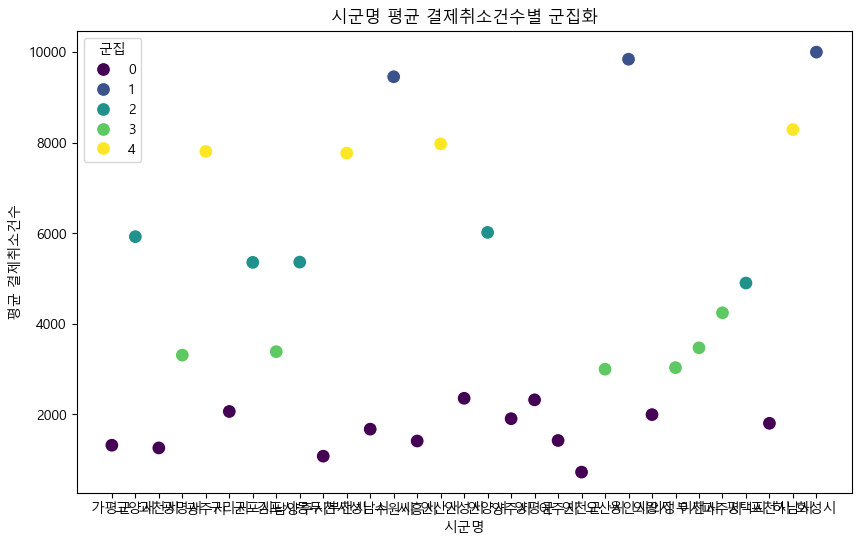

In [62]:

# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# 결제취소건수 정규화 (0과 1 사이의 값으로 변환)
scaler = MinMaxScaler()
avg_cancel_count['결제취소건수_scaled'] = scaler.fit_transform(avg_cancel_count[['결제취소건수']])

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
avg_cancel_count['군집'] = kmeans.fit_predict(avg_cancel_count[['결제취소건수_scaled']])

# 각 군집별 시군명을 묶어서 출력
grouped = avg_cancel_count.groupby('군집')['시군명'].apply(list).reset_index()
print(grouped)

## 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_cancel_count, x='시군명', y='결제취소건수', hue='군집', palette='viridis', s=100)
plt.title('시군명 평균 결제취소건수별 군집화')
plt.xlabel('시군명')
plt.ylabel('평균 결제취소건수')
plt.legend(title='군집')
plt.show()

** 참고로 위는 군집의 순서정렬 전 말그대로 군집화만 진행한 것이기 때문에 군집0,1,2,3,4 는 다음 그래프에서 순서 정렬 됨

정규화와 군집화를 실행한 그래프 출력

정렬된 군집별 결제취소건수 범위: 

군집 0의 결제취소건수 범위: 0.0 - 3453.0

군집 1의 결제취소건수 범위: 3493.0 - 12404.0

군집 2의 결제취소건수 범위: 12797.0 - 30639.0

군집 3의 결제취소건수 범위: 40202.0 - 71239.0

군집 4의 결제취소건수 범위: 85449.0 - 128058.0



   군집                                                시군명
0   0  [가평군, 과천시, 구리시, 동두천시, 성남시, 시흥시, 안성시, 양주시, 양평군,...
1   1                                    [수원시, 용인시, 화성시]
2   2                              [고양시, 군포시, 남양주시, 안양시]
3   3               [광명시, 김포시, 오산시, 의정부시, 이천시, 파주시, 평택시]
4   4                               [광주시, 부천시, 안산시, 하남시]


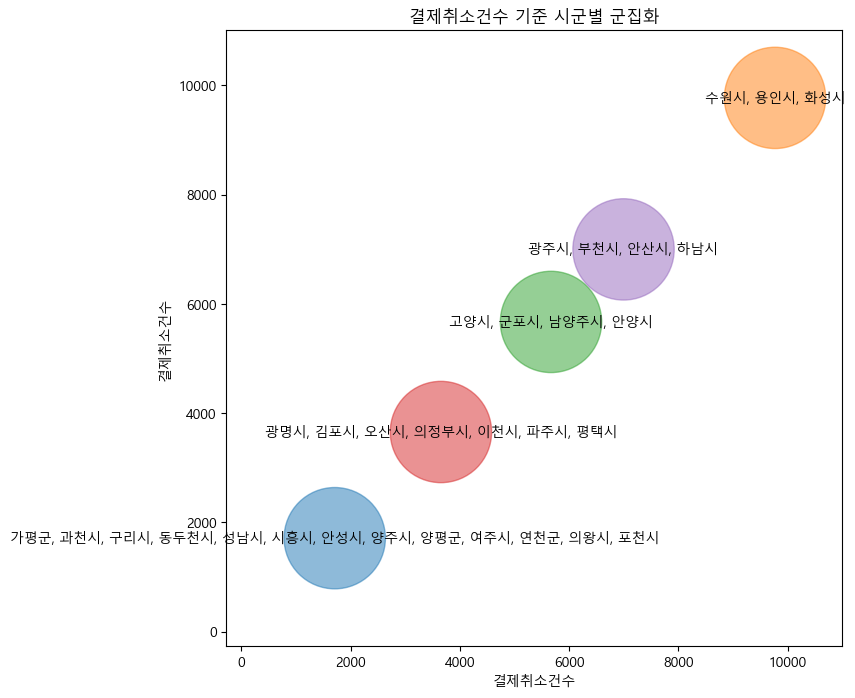

In [73]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 시군명 별로 평균 결제취소건수를 계산
avg_cancel_count = df.groupby('시군명')['결제취소건수'].mean().reset_index()

# KMeans를 사용하여 군집화
num_clusters = 5  # 원하는 군집 수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
avg_cancel_count['군집'] = kmeans.fit_predict(avg_cancel_count[['결제취소건수']])

# 각 군집별 시군명을 묶어서 출력
grouped = avg_cancel_count.groupby('군집')['시군명'].apply(list).reset_index()
print(grouped)

# 시각화
plt.figure(figsize=(20, 8))

# 원의 중심 좌표 설정
centers = kmeans.cluster_centers_

# 원의 반지름 설정
radius = 0.1  # 원의 반지름을 조정합니다.

# 군집의 결제취소건수 값으로 좌표를 설정합니다.
for i in range(num_clusters):
    cluster_points = avg_cancel_count[avg_cancel_count['군집'] == i]
    cluster_center = centers[i, 0]

    # 원 그리기
    circle = plt.Circle((cluster_center, cluster_center), radius * (avg_cancel_count['결제취소건수'].max() - avg_cancel_count['결제취소건수'].min()), color='C'+str(i), alpha=0.5)
    plt.gca().add_patch(circle)

    # 원 안에 텍스트 추가
    texts = ', '.join(cluster_points['시군명'])
    plt.text(cluster_center, cluster_center, texts, horizontalalignment='center', verticalalignment='center')

# 축 설정
plt.xlim(avg_cancel_count['결제취소건수'].min() - 1000, avg_cancel_count['결제취소건수'].max() + 1000)
plt.ylim(avg_cancel_count['결제취소건수'].min() - 1000, avg_cancel_count['결제취소건수'].max() + 1000)
plt.xlabel('결제취소건수')
plt.ylabel('결제취소건수')
plt.title('결제취소건수 기준 시군별 군집화')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


<hr>

<h3>2. </h3>